In [9]:
import cvp
import torch

import os

In [10]:
transforms = cvp.data.Compose([cvp.data.RandomResize(sizes=[(640, 640)]), cvp.data.ToTensor(), cvp.data.Normalize() ])

# transforms = cvp.data.transforms.detector_transforms(name='detr', mode='train')
root = '/Users/lvwenyu01/Desktop/workspace/dataset/coco/'

train_dataset = cvp.data.CocoDetection(img_folder=os.path.join(root, 'train2017'), 
                                       ann_file=os.path.join(root, 'annotations/instances_train2017_rand8.json'), 
                                       transforms=transforms, return_masks=True)

eval_dataset = cvp.data.CocoDetection(img_folder=os.path.join(root, 'val2017'), 
                                       ann_file=os.path.join(root, 'annotations/instances_val2017_debug_139.json'), 
                                       transforms=transforms, return_masks=True)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [12]:
import torch
def get_anchors(name='yolov5'):

    if name.lower() == 'yolov5':
        anchors = [[10,13, 16,30, 33,23], [30,61, 62,45, 59,119], [116,90, 156,198, 373,326]]
        return torch.tensor(anchors).reshape(3, 3, 2)

    else:
        raise RuntimeError('')


backbone = cvp.nn.CSPDarknet()
neck = cvp.nn.YOLOv5PAN(backbone.out_channels, backbone.depths[-1])
head = cvp.nn.YOLOv5Head(neck.out_channels, backbone.strides, get_anchors(), num_classes=80)

postprocess = cvp.nn.COCOPostprocess(conf_threshold=0.2, iou_threshold=0.45)
yololoss = cvp.nn.YOLOv5Loss(backbone.strides, head.anchors)

detector = cvp.nn.OneStageDetector(backbone=backbone, neck=neck, head=head, postprocess=postprocess)

In [13]:
detector.eval()
output = detector(torch.rand(1, 3, 640, 640))

print(output[0].keys())

dict_keys(['boxes', 'scores', 'labels'])


In [14]:
detector = cvp.nn.OneStageDetector(backbone=backbone, neck=neck, head=head, postprocess=None)
detector.train()

preds = detector(train_dataset[0][0][None])
loss = yololoss(preds, [train_dataset[0][1]])
loss.backward()

print(loss.item())


2.162576913833618


In [5]:
class EXP(cvp.core.ConfigBase):
    pass


In [6]:
cfg = EXP()

# cvp.core.Solver(cfg)

In [6]:
# state = torch.load('~/Downloads/yolov5l.pt')
# print(state.keys())
# _state = state['model'].state_dict()
# torch.save(_state, 'yolov5l.pt',)

origin_state = torch.load('../../yolov5/yolov5l.pt')
for n, p in origin_state.items():
    # print(n, p.shape)
    pass
    

state = detector.state_dict()

for n, p in detector.state_dict().items():
    # print(n, p.shape)
    if 'backbone.layers.0' in n:
        _n = n.replace('backbone.layers.0', 'model.0')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'backbone.layers.1.0' in n:
        _n = n.replace('backbone.layers.1.0', 'model.1')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'backbone.layers.1.1' in n:
        _n = n.replace('backbone.layers.1.1', 'model.2')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'backbone.layers.2.0' in n:
        _n = n.replace('backbone.layers.2.0', 'model.3')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'backbone.layers.2.1' in n:
        _n = n.replace('backbone.layers.2.1', 'model.4')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'backbone.layers.3.0' in n:
        _n = n.replace('backbone.layers.3.0', 'model.5')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'backbone.layers.3.1' in n:
        _n = n.replace('backbone.layers.3.1', 'model.6')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'backbone.layers.4.0' in n:
        _n = n.replace('backbone.layers.4.0', 'model.7')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'backbone.layers.4.1' in n:
        _n = n.replace('backbone.layers.4.1', 'model.8')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'backbone.layers.5' in n:
        _n = n.replace('backbone.layers.5', 'model.9')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'neck.fpn_stems.0' in n:
        _n = n.replace('neck.fpn_stems.0', 'model.10')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'neck.fpn_stems.1' in n:
        _n = n.replace('neck.fpn_stems.1', 'model.14')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)

    elif 'neck.fpn_csps.0' in n:
        _n = n.replace('neck.fpn_csps.0', 'model.13')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)

    elif 'neck.fpn_csps.1' in n:
        _n = n.replace('neck.fpn_csps.1', 'model.17')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'neck.pan_stems.0' in n:
        _n = n.replace('neck.pan_stems.0', 'model.18')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'neck.pan_stems.1' in n:
        _n = n.replace('neck.pan_stems.1', 'model.21')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)

    elif 'neck.pan_csps.0' in n:
        _n = n.replace('neck.pan_csps.0', 'model.20')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)

    elif 'neck.pan_csps.1' in n:
        _n = n.replace('neck.pan_csps.1', 'model.23')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)
        
    elif 'head.convs' in n:
        _n = n.replace('head.convs', 'model.24.m')
        assert state[n].data.shape == origin_state[_n].shape
        state[n].data = origin_state[_n]
        origin_state.pop(_n)

    else:
        print(n, state[n].shape)
        

for n, p in origin_state.items():
    print(n, p.shape)


model.24.anchors torch.Size([3, 3, 2])
model.24.anchor_grid torch.Size([3, 1, 3, 1, 1, 2])


['boxes', 'labels', 'masks', 'image_id', 'area', 'iscrowd', 'orig_size', 'size', 'ratios']
9
torch.Size([3, 426, 640])
tensor([1.0000, 1.5023])


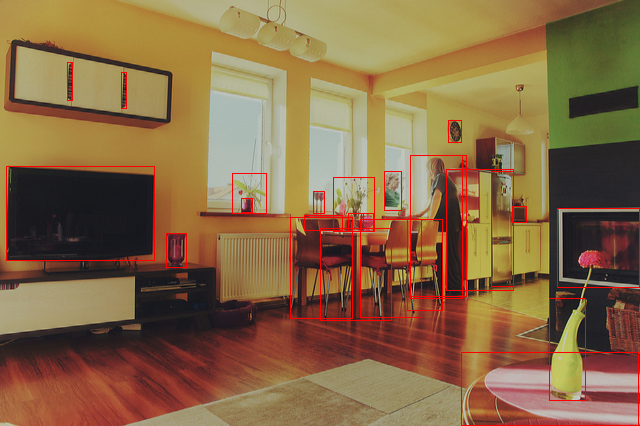

In [7]:
import torchvision
import torchvision.ops as ops


detector.eval()
detector.load_state_dict(state)

n = 0
data = eval_dataset[n][0]
target = eval_dataset[n][1]

print(list(target.keys()))
print(len(target))

# detector = cvp.nn.utils.reset_bn(detector)

output = detector(data[None], [target])

pred = output[0]
# labels = [str(lab) for lab in pred[:, -1].tolist()]
# print(labels)


data = torchvision.transforms.Resize([k.item() for k in target['orig_size']])(data)
print(data.shape)

# boxes = pred[:, :4] / torch.tensor([target['ratios'][0], target['ratios'][1], target['ratios'][0], target['ratios'][1]])
print(target['ratios'])

im = torchvision.utils.draw_bounding_boxes((data * 255).to(torch.uint8), pred['boxes'], colors='red')
torchvision.transforms.ToPILImage()(im)

In [10]:
# import torch

# backbone = cvp.nn.CSPDarknet()
# neck = cvp.nn.YOLOv5PAN(backbone.out_channels, backbone.depths[-1])
# head = cvp.nn.YOLOv5Head(neck.out_channels, backbone.strides, get_anchors(), num_classes=80)
# postprocess = cvp.nn.BatchNMS(0.2, 0.45)
# # 
# detector = cvp.nn.OneStageDetector(backbone=backbone, neck=neck, head=head, postprocess=postprocess)

# torch.onnx.export(detector, torch.rand(1, 3, 640, 640), '../../test.onnx', opset_version=11)

In [ ]:
import torch
import torch.nn as nn

def reset_bn(m, eps=0.001, momentum=0.03, affine=None, track_running_stats=None):
    _m = m
    if isinstance(m, nn.BatchNorm2d):
        eps = eps if eps is not None else m.eps
        momentum = momentum if momentum is not None else m.momentum
        affine = affine if affine is not None else m.affine
        track_running_stats = track_running_stats if track_running_stats is not None else m.track_running_stats

        _m = nn.BatchNorm2d(m.num_features, eps=eps, momentum=momentum, affine=affine, track_running_stats=track_running_stats)
        if m.affine:
            with torch.no_grad():
                _m.weight = m.weight
                _m.bias = m.bias
        _m.running_mean = m.running_mean
        _m.running_var = m.running_var
        _m.num_batches_tracked = m.num_batches_tracked

    for name, child in m.named_children():
        _m.add_module(name, reset_bn(child))

    del m 
    return _m 

In [ ]:
# m = torchvision.models.resnet18()
m = nn.Sequential(nn.BatchNorm2d(10))
m._test = 0
print(m._test)


m = reset_bn(m)

print(m)
print(m._test)

In [8]:
def fn(items):
    '''
    '''
    return torch.cat([x[0][None] for x in items]), [x[1] for x in items]

eval_dataloader = torch.utils.data.DataLoader(eval_dataset, batch_size=1, collate_fn=fn)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1, collate_fn=fn)

for images, targets in eval_dataloader:
    print(images.shape)
    print(len(targets))
    

    output = detector(images, targets)
    # print(output)

torch.Size([1, 3, 640, 640])
1


In [9]:
cvp.data.evaluator.coco_evaluate(detector, train_dataloader, device='cpu')

Test:  [0/8]  eta: 0:00:25  model_time: 3.1406 (3.1406)  evaluator_time: 0.0097 (0.0097)  time: 3.2084  data: 0.0581
Test:  [7/8]  eta: 0:00:02  model_time: 2.8850 (2.9179)  evaluator_time: 0.0020 (0.0031)  time: 2.9413  data: 0.0203
Test: Total time: 0:00:23 (2.9421 s / it)
Averaged stats: model_time: 2.8850 (2.9179)  evaluator_time: 0.0020 (0.0031)
Accumulating evaluation results...
DONE (t=0.06s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.581
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.805
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.604
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.418
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.593
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.717
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.501
 Average Recall    